In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
iris=pd.read_csv('iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
iris[iris['SepalWidthCm']>4]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [14]:
iris.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [22]:
(iris[iris['PetalWidthCm']>1])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
(iris[iris['PetalWidthCm']>2])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


In [25]:
plt.fig_size=(10,12)

In [27]:
plt.show()

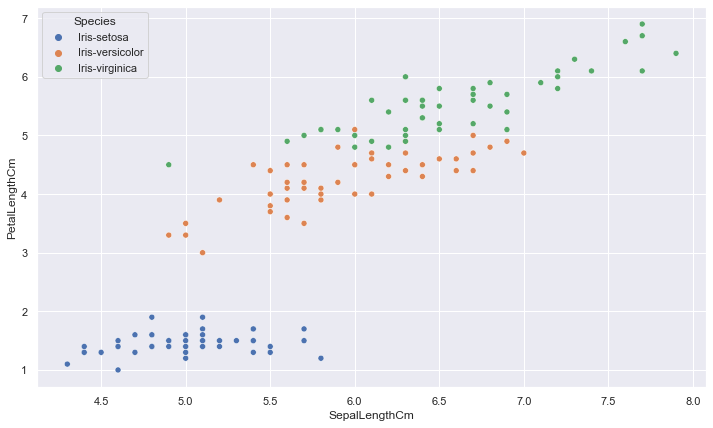

In [46]:
sns.set(rc={'figure.figsize':(12,7)},style='darkgrid')
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=iris,hue='Species')
plt.show()

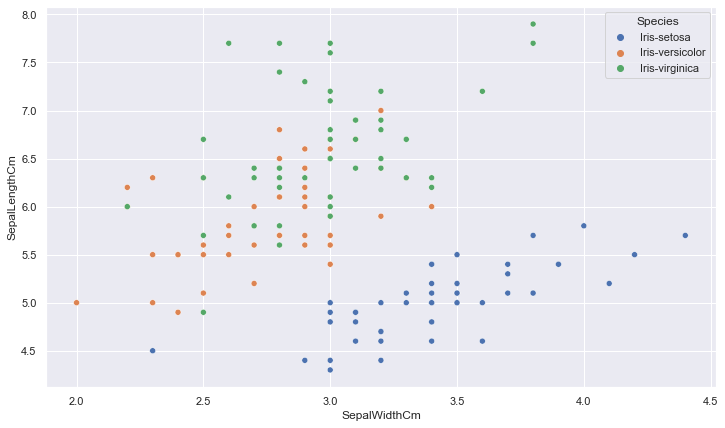

In [55]:
sns.scatterplot(y='SepalLengthCm',x='SepalWidthCm',data=iris,hue='Species')
plt.show()

In [60]:
x_train,x_test,y_train,y_test=train_test_split(iris[['SepalWidthCm']],iris[['SepalLengthCm']],test_size=0.3)

In [61]:
x_train.head()

,SepalWidthCm
30,3.1
78,2.9
39,3.4
82,2.7
86,3.1


In [62]:
type(x_test)

pandas.core.frame.DataFrame

In [63]:
y_test.head()

,SepalLengthCm
95,5.7
2,4.7
8,4.4
142,5.8
81,5.5


In [64]:
x_train.columns

Index(['SepalWidthCm'], dtype='object')

In [65]:
lr=LinearRegression()

In [66]:
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred=lr.predict(x_test)

In [74]:
y_pred[:5]

array([[5.83879739],
       [5.79716933],
       [5.85961143],
       [5.90123949],
       [5.96368159]])

In [75]:
y_test.head()

,SepalLengthCm
95,5.7
2,4.7
8,4.4
142,5.8
81,5.5


In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
mean_squared_error(y_test,y_pred)

0.6713069134673773

In [78]:
# mode 2

In [82]:
x=iris[['SepalLengthCm','PetalWidthCm','PetalLengthCm']]
y=iris[['SepalWidthCm']]

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [85]:
lr.fit(x_train,y_train)

LinearRegression()

In [86]:
y_pred=lr.predict(x_test)

In [87]:
y_pred[:5]

array([[2.52591876],
       [3.22081878],
       [2.92817884],
       [2.97202572],
       [2.83134577]])

In [88]:
y_test.head()

,SepalWidthCm
103,2.9
75,3.0
136,3.4
56,3.3
129,3.0


In [89]:
mean_squared_error(y_test,y_pred)

0.11297297466782553